# Plot EMU adjoint, convolution, and attribution outputs

## by manually loading dict files and using ecco functions

In [1]:
from dask.distributed import Client

client = Client("tcp://127.0.0.1:37641")
client

<Client: 'tcp://127.0.0.1:37641' processes=4 threads=8, memory=61.46 GiB>

In [27]:
import numpy as np
import ecco_v4_py as ecco
import xarray as xr
import matplotlib.pyplot as plt
import ecco_access as ea
from os.path import join,expanduser

# identify user's home directory
user_home_dir = expanduser('~')

import sys
sys.path.append('/efs_ecco/ECCO/EMU/emu_userinterface_dir/')
import emu_plot_arg_py as ept

## Paths to EMU outputs:

12-month adjoint:
`/efs_ecco/nrosenbe/emu_adj_12_12_1_drake_ssh_mask.bin_1` <br>

Convolution:
`/efs_ecco/nrosenbe/emu_new/emu_conv_12_12_1_drake_ssh_mask.bin_1_53` <br>

Attribution:
`/efs_ecco/ohoundeg/EMU/EMU_atr03/emu_atrb_m_1_drake_ssh_mask.bin_1`

### Adjoint

In [3]:
globals_dict = ept.emu_plot(run_name="/efs_ecco/nrosenbe/emu_adj_12_12_1_drake_ssh_mask.bin_1/",
                            ctrl_num_list=[1, 2, 3, 4, 5, 6, 7, 8],
                            lag_beg=0, lag_end=1000000);

Found file: /efs_ecco/ECCO/EMU/emu_userinterface_dir/emu_env.singularity
EMU Input Files directory: /efs/owang/ECCO/EMU_test/emu_input_dir

Specified directory of EMU run to examine: /efs_ecco/nrosenbe/emu_adj_12_12_1_drake_ssh_mask.bin_1/

Reading /efs_ecco/nrosenbe/emu_adj_12_12_1_drake_ssh_mask.bin_1

Reading Adjoint Tool output ... 

Found file: adxx_empmr.0000000129.data

*********************************************
Read adjoint gradient for empmr
   adxx: adjoint gradient as a function of space and lag
from file /efs_ecco/nrosenbe/emu_adj_12_12_1_drake_ssh_mask.bin_1/output/adxx_empmr.0000000129.data
 
Zero lag at (week/record) = 54
Max  lag at (week/record) = 1
Specified start and end files #: 0 and 1000000

*********************************************
Outputting adxx_empmr

Found file: adxx_pload.0000000129.data

*********************************************
Read adjoint gradient for pload
   adxx: adjoint gradient as a function of space and lag
from file /efs_ecco/nrosenbe/e

### Convolution

In [11]:
import sys
sys.path.append('/efs_ecco/ECCO/EMU/emu_userinterface_dir/')
import emu_plot_arg_py as ept
import numpy as np
import matplotlib.pyplot as plt
import lib_python
import plot_conv
import plot_conv_sub

In [138]:
globals_dict = ept.emu_plot(run_name="/efs_ecco/nrosenbe/emu_new/emu_conv_12_12_1_drake_ssh_mask.bin_1_53/",
                            expvar_space='y');

Found file: /efs_ecco/ECCO/EMU/emu_userinterface_dir/emu_env.singularity
EMU Input Files directory: /efs/owang/ECCO/EMU_test/emu_input_dir

Specified directory of EMU run to examine: /efs_ecco/nrosenbe/emu_new/emu_conv_12_12_1_drake_ssh_mask.bin_1_53/

Reading /efs_ecco/nrosenbe/emu_new/emu_conv_12_12_1_drake_ssh_mask.bin_1_53

Reading Convolution Tool output ... 
<_io.BufferedReader name='/efs_ecco/nrosenbe/emu_new/emu_conv_12_12_1_drake_ssh_mask.bin_1_53/output/recon1d_empmr.data'>
<_io.BufferedReader name='/efs_ecco/nrosenbe/emu_new/emu_conv_12_12_1_drake_ssh_mask.bin_1_53/output/recon1d_pload.data'>
<_io.BufferedReader name='/efs_ecco/nrosenbe/emu_new/emu_conv_12_12_1_drake_ssh_mask.bin_1_53/output/recon1d_qnet.data'>
<_io.BufferedReader name='/efs_ecco/nrosenbe/emu_new/emu_conv_12_12_1_drake_ssh_mask.bin_1_53/output/recon1d_qsw.data'>
<_io.BufferedReader name='/efs_ecco/nrosenbe/emu_new/emu_conv_12_12_1_drake_ssh_mask.bin_1_53/output/recon1d_saltflux.data'>
<_io.BufferedReader nam

In [139]:
print(globals_dict.keys())
print(globals_dict['return_vars'].keys())

dict_keys(['return_vars', 'emu'])
dict_keys(['time_values', 'time_values_min', 'time_values_max', 'recon1d_sum_all_ctrl_vs_lag_time', 'recon1d_vs_lag_time', 'lag_in_weeks', 'expvar_vs_lag', 'ctrl_idx', 'expvar_vs_ctrl', 'num_lag_in_weeks', 'num_ctrl', 'ctrl_name', 'ctrl_idx_min', 'ctrl_idx_max', 'expvar_vs_space'])


In [141]:
print(globals_dict['return_vars']['ctrl_name'])

['empmr', 'pload', 'qnet', 'qsw', 'saltflux', 'spflx', 'tauu', 'tauv']


In [140]:
# Extract return dictionary
return_vars_dict = globals_dict.get('return_vars')

In [142]:
# Extract data for the plot
lag_in_weeks = return_vars_dict['lag_in_weeks'] 
time_values = return_vars_dict['time_values'] 
ctrl_name = return_vars_dict['ctrl_name']
recon1d_sum_all_ctrl_vs_lag_time = return_vars_dict['recon1d_sum_all_ctrl_vs_lag_time']
recon1d_vs_lag_time = return_vars_dict['recon1d_vs_lag_time']

In [157]:
tauu = recon1d_vs_lag_time[-2,:,:]
tauv = recon1d_vs_lag_time[-1,:,:]

recon_wind = tauu + tauv

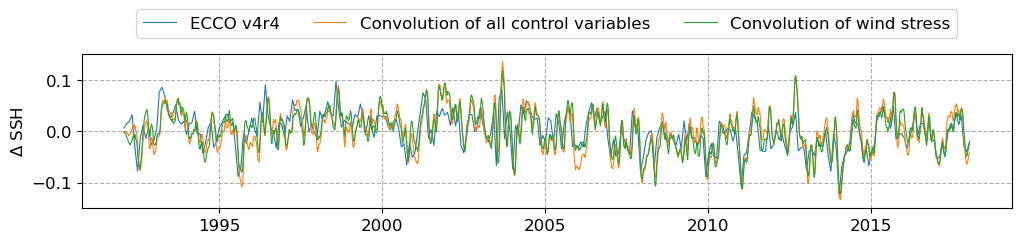

In [182]:
lw = 0.8
d_ssh_anomaly.plot(figsize=[12,2],label='ECCO v4r4',linewidth=lw);
plt.plot(np.linspace(d_ssh_anomaly.time.values[0],d_ssh_anomaly.time.values[-1],1357),\
         recon1d_sum_all_ctrl_vs_lag_time[-1],label='Convolution of all control variables',linewidth=lw);
plt.plot(np.linspace(d_ssh_anomaly.time.values[0],d_ssh_anomaly.time.values[-1],1357),\
         recon_wind[-1],label='Convolution of wind stress',linewidth=lw);

plt.ylabel("$\Delta$ SSH")
plt.ylim(-0.15,0.15)
plt.xlabel("")
plt.grid(linewidth=lw,linestyle='dashed')
plt.legend(ncol=3,bbox_to_anchor=[0.5,1.2],loc='center');

Create DataArray for attribution output

In [72]:
fctrl

['lhs', 'wind', 'htflx', 'fwflx', 'sflx', 'pload', 'ic']

In [78]:
fctrl_longname = ['LHS', 'wind stress', 'heat flux', 'freshwater flux', 'salt flux', 'pressure loading', 'initial condition']

In [79]:
# atrb_ds = xr.DataArray(atrb,dims=['var','time'],coords=dict(var=fctrl,time=atrb_t))
atrb_ds = xr.DataArray(atrb,dims=['var','time'],coords=dict(var=fctrl_longname,time=atrb_t))

In [81]:
# atrb_wind_ds = atrb_ds.sel(var=['lhs','wind'])
# lhs_minus_wind = atrb_wind_ds.sel(var=['lhs']).isel(var=0) - atrb_wind_ds.sel(var=['wind']).isel(var=0)
# lhs_minus_wind.name = 'lhs - wind'

atrb_wind_ds = atrb_ds.sel(var=['LHS','wind stress'])
lhs_minus_wind = atrb_wind_ds.sel(var=['LHS']).isel(var=0) - atrb_wind_ds.sel(var=['wind stress']).isel(var=0)
lhs_minus_wind.name = 'LHS - wind stress'

### Attribution

In [15]:
import sys
sys.path.append('/efs_ecco/ECCO/EMU/emu_userinterface_dir/')
import emu_plot_arg_py as ept

In [16]:
# Attribution Tool
globals_dict = ept.emu_plot(run_name="/efs_ecco/ohoundeg/EMU/EMU_atr03/emu_atrb_m_1_drake_ssh_mask.bin_1")

Found file: /efs_ecco/ECCO/EMU/emu_userinterface_dir/emu_env.singularity
EMU Input Files directory: /efs/owang/ECCO/EMU_test/emu_input_dir

Specified directory of EMU run to examine: /efs_ecco/ohoundeg/EMU/EMU_atr03/emu_atrb_m_1_drake_ssh_mask.bin_1

Reading /efs_ecco/ohoundeg/EMU/EMU_atr03/emu_atrb_m_1_drake_ssh_mask.bin_1

Reading Attribution Tool output ... 
*********************************************
Read OBJF and contributions to it from different controls
   atrb: temporal anomaly 
   atrb_mn: reference time-mean 
   fctrl: names of atrb/atrb_mn variables 
from file /efs_ecco/ohoundeg/EMU/EMU_atr03/emu_atrb_m_1_drake_ssh_mask.bin_1/output/atrb.out_312

*********************************************
Read variable 
   atrb_hr: sample time (hours from 1/1/1992 12Z)
from file /efs_ecco/ohoundeg/EMU/EMU_atr03/emu_atrb_m_1_drake_ssh_mask.bin_1/output/atrb.step_312


***********************
EMU variables read as global variables in module global_emu_var (emu); e.g., emu.nx
************

In [17]:
globals_dict.keys()

dict_keys(['return_vars', 'emu'])

In [21]:
globals_dict['return_vars'].keys()

dict_keys(['time_values', 'variable', 'ctrl_name', 'plot_title'])

In [22]:
# Extract return dictionary
return_vars_dict = globals_dict.get('return_vars')

In [62]:
# Extract data for the plot
atrb_t = return_vars_dict['time_values'] 
atrb = return_vars_dict['variable']
fctrl = return_vars_dict['ctrl_name']
frun_file = return_vars_dict['plot_title']
nterms = len(fctrl)
fld_all = return_vars_dict['variable'] 

# Create plot
# plot_atrb.create_atrb_fig(atrb_t, atrb, frun_file, fctrl, nterms)

In [25]:
atrb.shape

(7, 312)

Create DataArray for attribution output

In [72]:
fctrl

['lhs', 'wind', 'htflx', 'fwflx', 'sflx', 'pload', 'ic']

In [78]:
fctrl_longname = ['LHS', 'wind stress', 'heat flux', 'freshwater flux', 'salt flux', 'pressure loading', 'initial condition']

In [79]:
# atrb_ds = xr.DataArray(atrb,dims=['var','time'],coords=dict(var=fctrl,time=atrb_t))
atrb_ds = xr.DataArray(atrb,dims=['var','time'],coords=dict(var=fctrl_longname,time=atrb_t))

In [81]:
# atrb_wind_ds = atrb_ds.sel(var=['lhs','wind'])
# lhs_minus_wind = atrb_wind_ds.sel(var=['lhs']).isel(var=0) - atrb_wind_ds.sel(var=['wind']).isel(var=0)
# lhs_minus_wind.name = 'lhs - wind'

atrb_wind_ds = atrb_ds.sel(var=['LHS','wind stress'])
lhs_minus_wind = atrb_wind_ds.sel(var=['LHS']).isel(var=0) - atrb_wind_ds.sel(var=['wind stress']).isel(var=0)
lhs_minus_wind.name = 'LHS - wind stress'

Open SSH data from ECCO directly

In [87]:
ssh_shortname = "ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4"
access_mode = 's3_open_fsspec'
download_root_dir = join(user_home_dir,'efs_ecco','ECCO_V4r4_PODAAC')
jsons_root_dir = join(user_home_dir,'efs_ecco','mzz-jsons')

In [88]:
ssh_ds = ea.ecco_podaac_to_xrdataset(ssh_shortname,\
                                     StartDate='1992-01',EndDate='2017-12',\
                                     mode=access_mode,\
                                     download_root_dir=download_root_dir,\
                                     max_avail_frac=0.5,\
                                     jsons_root_dir=jsons_root_dir)

In [89]:
drake_pt = ssh_ds.SSH.isel(i=88,j=60,tile=11)
antar_pt = ssh_ds.SSH.isel(i=6,j=70,tile=12)

In [92]:
d_ssh = (drake_pt-antar_pt)
d_ssh_anomaly = d_ssh - d_ssh.mean()

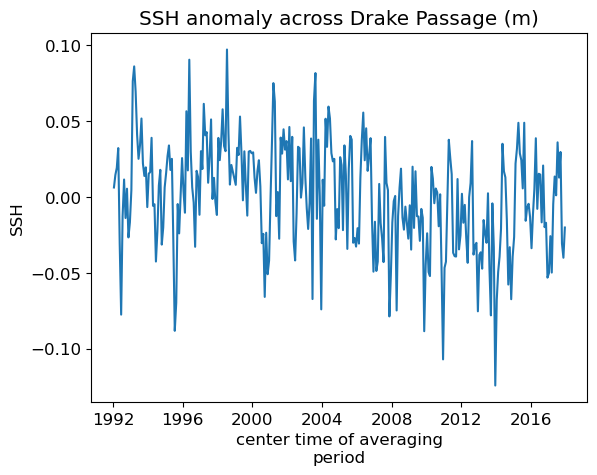

In [93]:
d_ssh_anomaly.plot();
plt.title("SSH anomaly across Drake Passage (m)");

In [101]:
# make time coord the same
d_ssh_anomaly['time'] = lhs_minus_wind.time

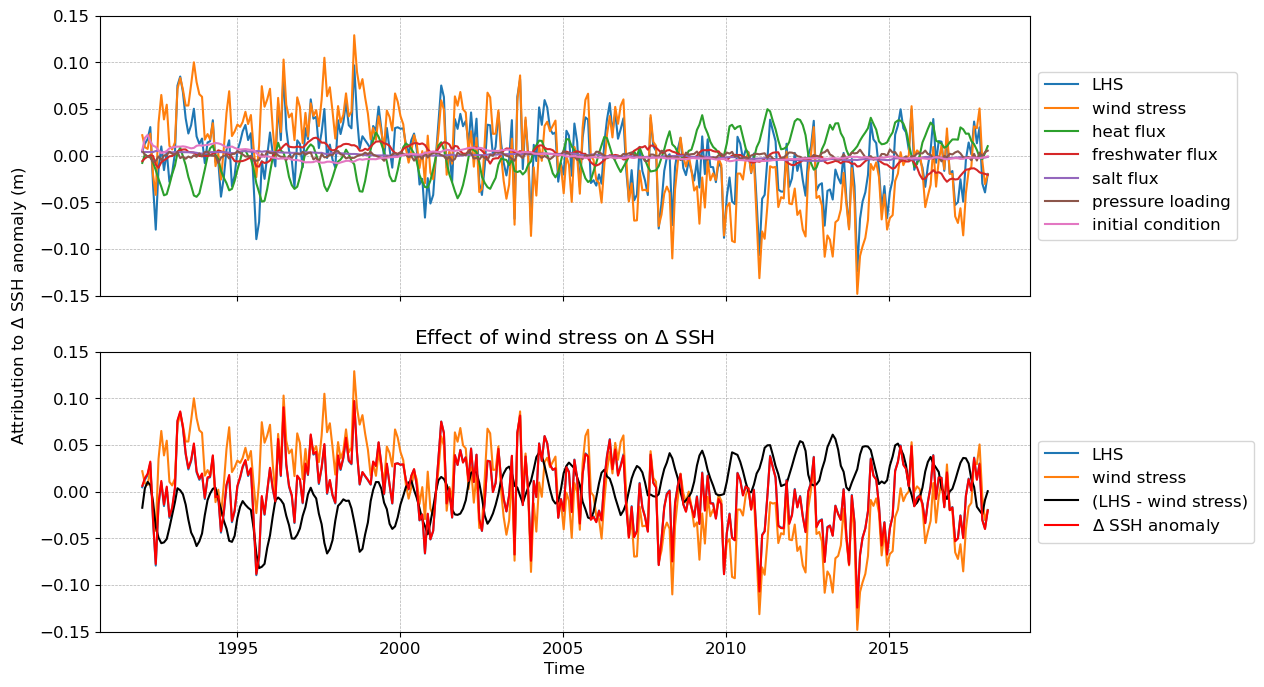

In [137]:
plt.rcParams['font.size'] = 12

fig, (ax1,ax2) = plt.subplots(2,1,figsize=[12,8],sharex=True)

atrb_ds.plot(ax=ax1,hue='var',label=fctrl_longname)

atrb_wind_ds.plot(ax=ax2,hue='var',label=['LHS','wind stress']);
lhs_minus_wind.plot(ax=ax2,label='(LHS - wind stress)',color='k')
d_ssh_anomaly.plot(ax=ax2,label='$\Delta$ SSH anomaly',color='r');

# ax1.set_ylabel("Attribution to $\Delta$ SSH anomaly (m)")
# ax2.set_ylabel("Attribution to $\Delta$ SSH anomaly (m)")
ax1.set_xlabel("")
ax2.set_xlabel("Time");

for ax in (ax1,ax2):
    ax.grid(linestyle='dashed',linewidth=0.5)
    ax.legend(loc='center left',bbox_to_anchor=[1, 0.5],ncol=1)
    ax.set_ylim(-0.15,0.15)
    ax.set_ylabel("")
    
# ax1.set_title("Attribution Output for Drake Passage SSH Change")
ax2.set_title("Effect of wind stress on $\Delta$ SSH");

fig.text(0.05,0.35,"Attribution to $\Delta$ SSH anomaly (m)",rotation=90);